In [1]:
# Imports
import os
import time

import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

# Data Visualization
def plothistory(hist):
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  # vertical range: [0, 1]
    plt.show()

In [2]:
# Read Data
raw_text_corpus = open("../data/diverse_namecorpus.txt", "rb").read().decode(encoding="utf-8")

print(f"Length of text (in characters): {len(raw_text_corpus)}")
print(raw_text_corpus)
raw_text_corpus

Length of text (in characters): 1406
Rumptious Rinkstilskin
Cornarius Wigglebottom
Jonesington Julius Jackson XI
Quantill Shawn King II
Michael McTavish X
Luther Beckam Jr
Deshawn Shaun Mark
Robert Dingleberry Twain
Ausante Adams IV
Cameron Demarcus Williams VII
Lequan Hubert Smith
Randal Cunningham
DeMarkus Flannigan the IVth
Darnell Rashad Watkins III
Quwane Swagnalious Mordool
Stephens Aspen Devonte
Deltrese DeRose Limonthemus
Cornelius DeShawn Williams XIV
Romulus Daquan Venistritus XIX
Quandale Dingle
Quantavious Octanopolous Obama XII
Kumalala Savesta
Bonerbeater D. Gooblesquibbins
Albert Doo-Doo Bittleton VIII
Quandalano Barnacle Dingleberry VI
Bonerbeater D. Periwinkle IV
Quadius Scratchensniff Dingle Sr
Doodooshit Jonathan Williams
Doodoosniff A. Dookey III
Quandala B. Doodleberry
Tickletipson Scratchensniff Pringleton
Quandingling Big man Gooblesquibbins VII
Garfield Doo-Doo Zoppity Bop-Bop-Bop Bittleton VIII
Quanfrazzle Squintillion Winkledink Jr
Tickletipson Barnacle Tickle

"Rumptious Rinkstilskin\r\nCornarius Wigglebottom\r\nJonesington Julius Jackson XI\r\nQuantill Shawn King II\r\nMichael McTavish X\r\nLuther Beckam Jr\r\nDeshawn Shaun Mark\r\nRobert Dingleberry Twain\r\nAusante Adams IV\r\nCameron Demarcus Williams VII\r\nLequan Hubert Smith\r\nRandal Cunningham\r\nDeMarkus Flannigan the IVth\r\nDarnell Rashad Watkins III\r\nQuwane Swagnalious Mordool\r\nStephens Aspen Devonte\r\nDeltrese DeRose Limonthemus\r\nCornelius DeShawn Williams XIV\r\nRomulus Daquan Venistritus XIX\r\nQuandale Dingle\r\nQuantavious Octanopolous Obama XII\r\nKumalala Savesta\r\nBonerbeater D. Gooblesquibbins\r\nAlbert Doo-Doo Bittleton VIII\r\nQuandalano Barnacle Dingleberry VI\r\nBonerbeater D. Periwinkle IV\r\nQuadius Scratchensniff Dingle Sr\r\nDoodooshit Jonathan Williams\r\nDoodoosniff A. Dookey III\r\nQuandala B. Doodleberry\r\nTickletipson Scratchensniff Pringleton\r\nQuandingling Big man Gooblesquibbins VII\r\nGarfield Doo-Doo Zoppity Bop-Bop-Bop Bittleton VIII\r\nQuan

In [3]:
# Remove all occurrences of those stupid '\r's
raw_text_corpus = raw_text_corpus.replace("\r", "")
raw_text_corpus

"Rumptious Rinkstilskin\nCornarius Wigglebottom\nJonesington Julius Jackson XI\nQuantill Shawn King II\nMichael McTavish X\nLuther Beckam Jr\nDeshawn Shaun Mark\nRobert Dingleberry Twain\nAusante Adams IV\nCameron Demarcus Williams VII\nLequan Hubert Smith\nRandal Cunningham\nDeMarkus Flannigan the IVth\nDarnell Rashad Watkins III\nQuwane Swagnalious Mordool\nStephens Aspen Devonte\nDeltrese DeRose Limonthemus\nCornelius DeShawn Williams XIV\nRomulus Daquan Venistritus XIX\nQuandale Dingle\nQuantavious Octanopolous Obama XII\nKumalala Savesta\nBonerbeater D. Gooblesquibbins\nAlbert Doo-Doo Bittleton VIII\nQuandalano Barnacle Dingleberry VI\nBonerbeater D. Periwinkle IV\nQuadius Scratchensniff Dingle Sr\nDoodooshit Jonathan Williams\nDoodoosniff A. Dookey III\nQuandala B. Doodleberry\nTickletipson Scratchensniff Pringleton\nQuandingling Big man Gooblesquibbins VII\nGarfield Doo-Doo Zoppity Bop-Bop-Bop Bittleton VIII\nQuanfrazzle Squintillion Winkledink Jr\nTickletipson Barnacle Ticklepi

Vocabulary: ListWrapper(['<UNK>', ' ', "'", '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '<', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
Input: Tensor("strided_slice:0", shape=(None,), dtype=int64)
Target: Tensor("strided_slice_1:0", shape=(None,), dtype=int64)
Corpus ID Tensor Shape: (49, None)
Corpus ID tf.Dataset: <MapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Shuffled Dataset Object: <PrefetchDataset element_spec=(TensorSpec(shape=(49, None), dtype=tf.int64, name=None), TensorSpec(shape=(49, None), dtype=tf.int64, name=None))>
(array([[15, 35, 31, ...,  0,  0,  0],
       [15, 35, 31, ...,  0,  0,  0],
       [15, 35, 31, ...,  0,  0,  0],
       ...,
       [15

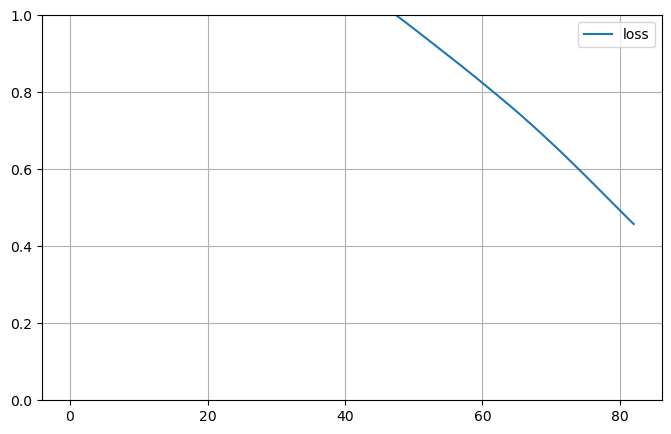

In [4]:
from tensorflow.keras.layers import GRU#, LSTM
from tensorflow.keras.optimizers import Adam
from namegeneration import NamePredictor, NameGenerator, Result

# Meat of the model is here
recurrent_cell = GRU(units=100, return_state=True, return_sequences=True)

# Create Generator
name_generator = NameGenerator(recurrent_cell)

# Train Generator
history = name_generator.train(raw_text_corpus, embedding_dim=100,
                               optimizer=Adam(learning_rate=0.01), metrics=[], callbacks=[], 
                               epochs=83, shuffle_data=True)

# Visualize the Data (even if it seems arbitrary)
plothistory(history)

In [7]:
# Generate 10 names out of thin air!
name_generator.generate(10, stop_at_timestep=100).value

Converting to string representation...


array(['Tichlagon Barnate',
       'Kularawa Squinalinius DitherbetbesDong Bop-Bon Bittle Bingleams',
       'Robertus Dithe TypEOS>Barevo', 'Cracue Bittep Bigameriy ',
       'Quandal man Bidtong Bavterocus ', 'humerius ',
       'Bopere DeDese Bop-Boston Deso',
       'Quanala Scrandon Bidtleton Binklea',
       'Jamaraus Asnesins Deg-5hawn Wi', 'Joneri'], dtype='<U63')